<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-betal
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-betal (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-betal
2.12.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides = 2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides = 2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides = 2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPolling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 28s 9ms/step - loss: 1.3077 - accuracy: 0.5503 - val_loss: 0.9861 - val_accuracy: 0.6562
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8439 - accuracy: 0.7069 - val_loss: 0.8508 - val_accuracy: 0.7092
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6885 - accuracy: 0.7638 - val_loss: 0.7110 - val_accuracy: 0.7603
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5801 - accuracy: 0.8018 - val_loss: 0.7139 - val_accuracy: 0.7688
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4933 - accuracy: 0.8305 - val_loss: 0.8429 - val_accuracy: 0.7442
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4139 - accuracy: 0.8596 - val_loss: 0.6842 - val_accuracy: 0.7914
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3524 - accuracy: 0.8777 - val_loss: 0.5809 - va

In [ ]:
# Fit with datas augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


<ipython-input-16-70d34a99dd6c>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)


1562/1562 [==============================] - 40s 23ms/step - loss: 1.4419 - accuracy: 0.4978 - val_loss: 1.5369 - val_accuracy: 0.4796
Epoch 2/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.9981 - accuracy: 0.6495 - val_loss: 0.9498 - val_accuracy: 0.6741
Epoch 3/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.8430 - accuracy: 0.7103 - val_loss: 0.8209 - val_accuracy: 0.7229
Epoch 4/50
1562/1562 [==============================] - 35s 23ms/step - loss: 0.7526 - accuracy: 0.7420 - val_loss: 0.7668 - val_accuracy: 0.7416
Epoch 5/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.6846 - accuracy: 0.7665 - val_loss: 0.5862 - val_accuracy: 0.8021
Epoch 6/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.6286 - accuracy: 0.7870 - val_loss: 0.8706 - val_accuracy: 0.7228
Epoch 7/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.5906 - accuracy: 0.7994 - val_loss: 0.6420 - val_accura

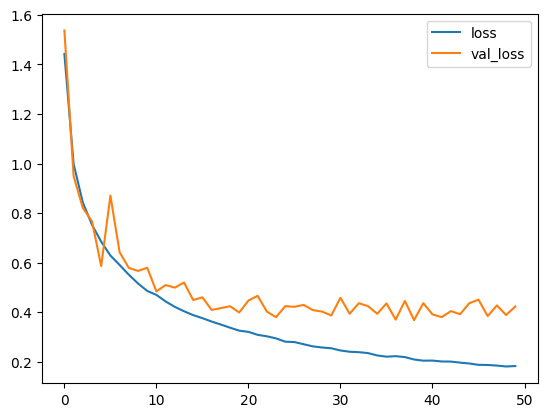

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

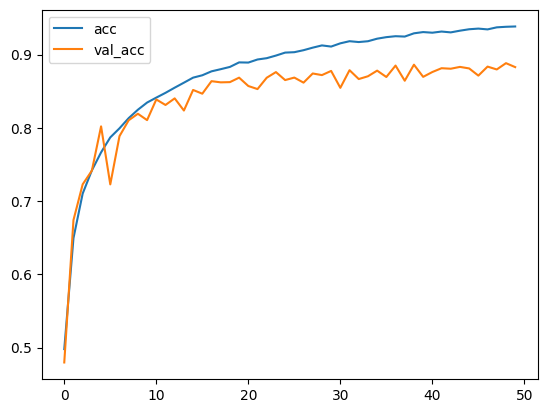

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[910   7  40   3   4   0   3   1  22  10]
 [  3 969   1   1   0   0   1   0   3  22]
 [ 16   2 908  20  18   5  19   1   7   4]
 [ 20   5  64 797  27  45  23   8   5   6]
 [  6   1  65  29 860   5  23   8   2   1]
 [  6   5  45 132  30 743  18  12   3   6]
 [  6   2  43  28   0   3 916   0   1   1]
 [ 15   1  24  18  35   8   5 884   4   6]
 [ 27  18   6   2   1   1   1   0 930  14]
 [ 11  59   4   3   0   1   1   0   8 913]]


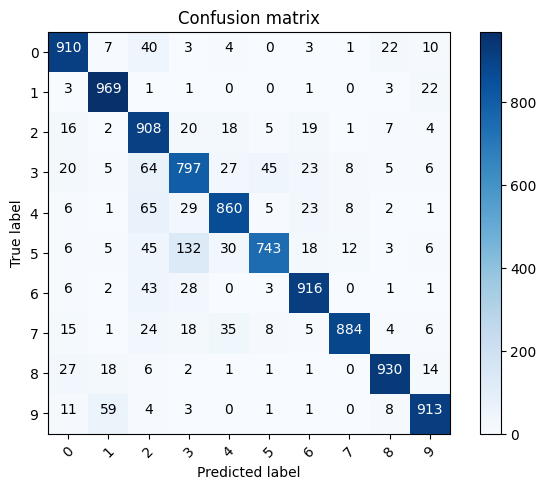

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: cat Predicted: bird')

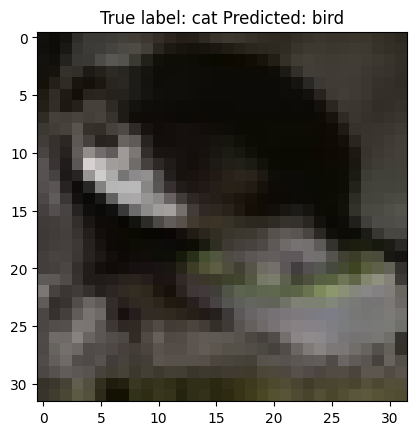

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0   